## Regularized Linear Regression and Bias-Variance

### Load training data

Loading and Visualizing Data ...


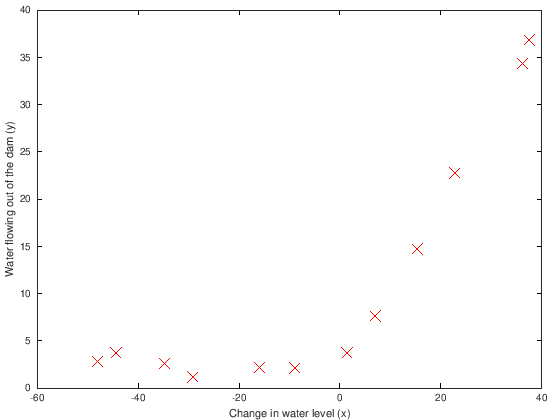

In [1]:
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

### Regularized Linear Regression Cost

In [2]:
theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


### Regularized Linear Regression Gradient

In [3]:
theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


### Train Linear Regression

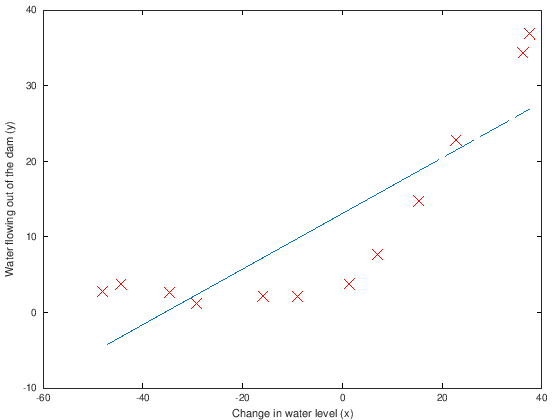

In [4]:
%  Once you have implemented the cost and gradient correctly, the
%  trainLinearReg function will use your cost function to train 
%  regularized linear regression.
% 
%  Write Up Note: The data is non-linear, so this will not give a great 
%                 fit.
%

%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

### Learning Curve for Linear Regression

    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12
 

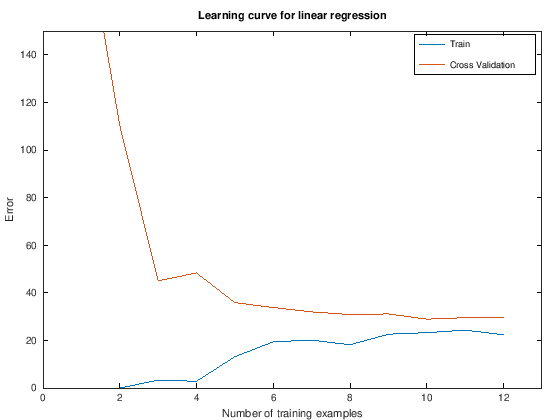

In [5]:
%  Next, you should implement the learningCurve function. 
%
%  Write Up Note: Since the model is underfitting the data, we expect to
%                 see a graph with "high bias" -- Figure 3 in ex5.pdf 
%

lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

### Feature Mapping for Polynomial Regression

In [6]:
%  One solution to this is to use polynomial regression. You should now
%  complete polyFeatures to map each example into its powers
%

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


### Learning Curve for Polynomial Regression

Iteration   200 | Cost: 1.663077e-01
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 62 column 12

Iteration     6 | Cost: 1.232595e-32
Iteration    60 | Cost: 3.286920e-31
Iteration    13 | Cost: 3.081488e-32
Iteration   200 | Cost: 3.638359e-08
Iteration   200 | Cost: 6.653096e-05
Iteration   200 | Cost: 3.155079e-04
Iteration   200 | Cost: 7.142733e-02
Iteration   200 | Cost: 1.151845e-01
Iteration   200 | Cost: 1.576784e-01
Iteration   200 | Cost: 1.643039e-01
Iteration   200 | Cost: 1.623370e-01
Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	154.638967
  	2		0.000000	154.844957
  	3		0.000000	31.745533
  	4		0.000000	29.248306
  	5		0.000000	6.504071
  	6		0.000067	10.560024
  	7		0.000316	26.522333
  	8		0.071427	6.325042
  	9		0.115185	9.968431
  	10		0.157678	8.347995
  	11		0.164304	10.270675
  	12		0.162337	20.272460


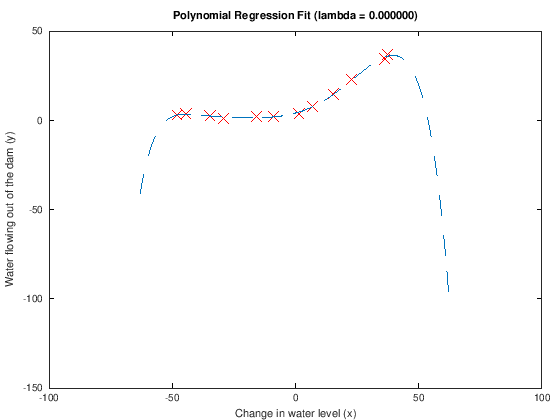

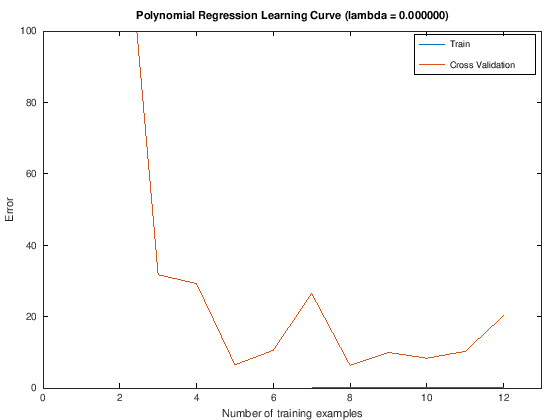

In [7]:
%  Now, you will get to experiment with polynomial regression with multiple
%  values of lambda. The code below runs polynomial regression with 
%  lambda = 0. You should try running the code with different values of
%  lambda to see how the fit and learning curve change.
%

lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

### Validation for Selecting Lambda

lambda = 0
Iteration   200 | Cost: 1.623370e-01
lambda =  0.0010000
Iteration   200 | Cost: 2.010065e-01
lambda =  0.0030000
Iteration   200 | Cost: 2.527362e-01
lambda =  0.010000
Iteration   200 | Cost: 3.865125e-01
lambda =  0.030000
Iteration   200 | Cost: 6.692910e-01
lambda =  0.10000
Iteration   200 | Cost: 1.443470e+00
lambda =  0.30000
Iteration   128 | Cost: 3.101591e+00
lambda =  1
Iteration    85 | Cost: 7.268148e+00
lambda =  3
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    validationCurve at line 51 column 12
Iteration    72 | Cost: 1.586769e+01
lambda =  10
Iteration    31 | Cost: 3.337220e+01
lambda		Train Error	Validation Error
 0.000000	0.162337	20.272460
 0.001000	0.174367	19.642893
 0.003000	0.182739	18.020660
 0.010000	0.223062	17.095526
 0.030000	0.281842	12.829717
 0.100000	0.459334	7.586839
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260625
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945508


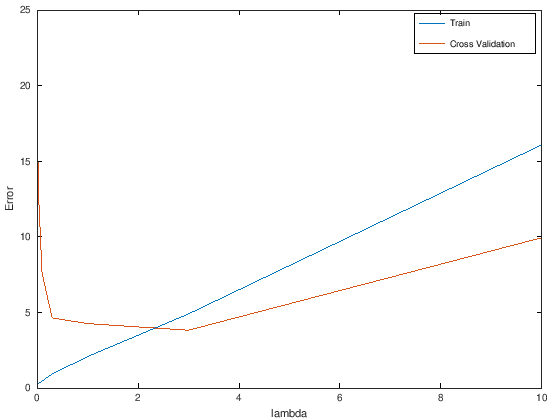

In [17]:
%  You will now implement validationCurve to test various values of 
%  lambda on a validation set. You will then use this to select the
%  "best" lambda value.
%

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end